## 1. Ряд Тейлора для синуса
Напишите функцию `mysin(x, n)`, вычисляющую сумму первых $n$
членов ряда Тейлора для функции $\sin x$:

$\sin x = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \dots$

Функция должна выполнять $O(n)$ операций и не содержать питоновских циклов. 
Постройте графики получающихся функций для разных $n$.
Вариант этой функции `mysin(x)` должен вычислять столько слагаемых,
пока результат перестанет изменяться (он может содержать циклы).
Протестируйте функцию на значениях 
$x=\frac{\pi}{2},\,\frac{11\pi}{2},\,\frac{21\pi}{2},\,\frac{31\pi}{2}$.
Постройте графики зависимости точности от числа слагаемых $n$.
Какова точность результатов, полученных для таких $x$? 
Сколько членов потребовалось?
Каков максимальный по абсолютному значению член?
Попробуйте объяснить, почему результаты
неудовлетворительные.

# Решение

Если мы рассмотрим ряд, то заметим, что каждый чётный член имеет отрицательный знак, а отличаются они друг от друга в $\frac{x^2}{(n+1)!}$ раз, где $n$ это позиция члена ряда. Эти знания нам пригодятся при написании кода.
Стоит сразу определиться с библиотеками, которые нам могут потребоваться. Для вычислений и математических формул — $numpy$, $scipy$, для отображения графиков — $matplotlib$, а для вывода данных в виде таблиц — $pandas$.

In [6]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

## 1. Напишите функцию $mysin(x, n)$, вычисляющую сумму первых  $𝑛$ членов ряда Тейлора для функции  $sin(𝑥)$

Для того, чтобы избежать использования питоновских циклов, мы можем воспользоваться генератором последовательностей arange из numpy. Также было бы неплохо дополнить функцию, на случай, если пользователь захочет вводить градусы вместо радиан.

In [7]:
def mysin1(x, n, degrees=False):
    if degrees:
        x = x / 180 * np.pi    # Переводим в радианы
    if x > (2*np.pi):    # Если x больше 2*π, то сокращаем
        k = x // (2 * np.pi)
        x -= k * 2*np.pi
    signs = (-1) ** np.arange(n)    # Генерируем список с чередованием знаков (+, -, +, ...)
    # Генерируем список с вычисленными значениями
    nums = x ** (2 * np.arange(n) + 1) / sp.special.factorial(2 * np.arange(n) + 1)     
    res = np.sum(signs * nums)    # Суммируем элементы ряда
    return res

## 2. Напишите вариант функции $mysin(x)$, который должен вычислять столько слагаемых, пока результат перестанет изменяться

Чтобы определить, когда прирост функции близок к нулю будем считать сумму, пока очередной вычисленный член не будет меньше некого малого значения $epsilon$, по умолчанию равного $10^{-16}$.

In [8]:
def mysin2(x, eps=1e-16, degrees=False):
    if degrees:
        x = math.radians(x)    # Переводим в радианы
    if x > 2*np.pi:    # Cокращаем, если x больше 2*π
        k = x // (2*np.pi)
        x -= k * 2*np.pi
    n = 1    # Номер члена последовательности
    num = x    # n+1 член последовательности
    res = x    # Сумма
    while abs(num) > eps:
        num *= -1 * x**2 / ((2*n)*(2*n + 1))
        res += num
        n += 1
    return res

## 3. Постройте графики получающихся функций для разных  𝑛

Построим графики, а также проанализируем как изменяется погрешность, при бо́льших значениях $n$

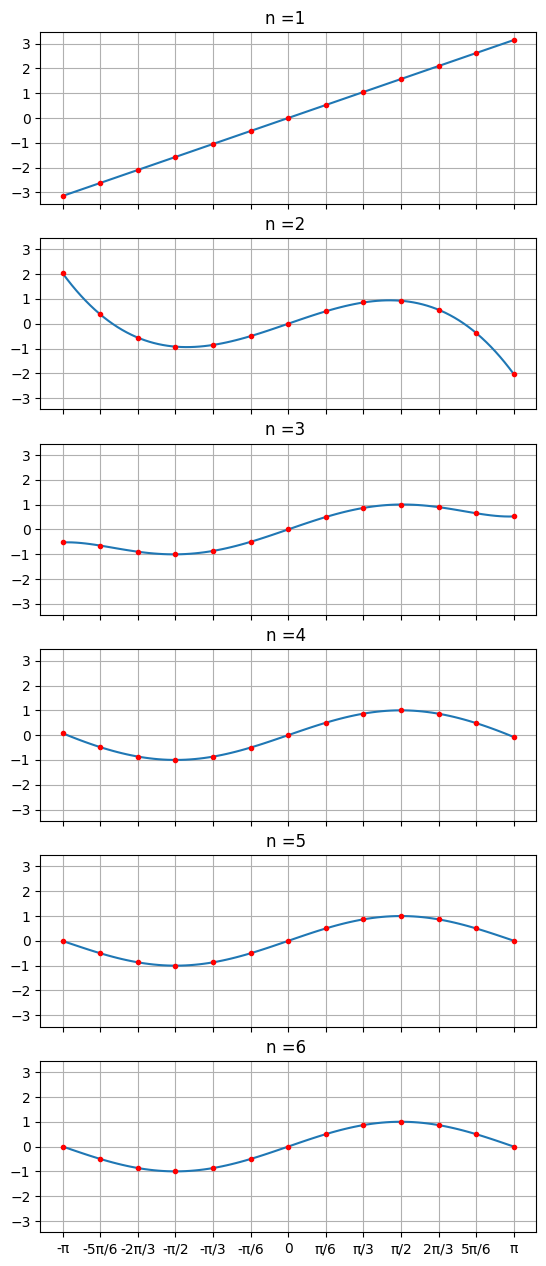

In [13]:
# Координаты x,y по которым будет строиться график
xs = np.linspace(-np.pi, np.pi, 100)    # Аргументы
ys = []    # Значения
# Координаты x,y точек для проверки
x_pts = [-np.pi, -5*np.pi/6, -2*np.pi/3, -np.pi/2, -np.pi/3, -np.pi/6, 0, np.pi/6, np.pi/3, 
         np.pi/2, 2*np.pi/3, 5*np.pi/6, np.pi]    # Аргументы
y_pts = []    # Значения

# Список подписей к соответствующим значениям на графике
x_labels = ['-π', '-5π/6', '-2π/3', '-π/2', '-π/3', '-π/6', '0', 'π/6', 'π/3', 'π/2', '2π/3', '5π/6', 'π']

ns = np.arange(1,21)    # Задаем значения n, для которых производим вычисления

# Строим графики для каждого значения n < 7 (объяснение ниже)
fig, axs = plt.subplots(6, 1, sharex=True, sharey=True)
plt.subplots_adjust(top=3, bottom=0.5)
# Устанавливаем деления и подписи к ним
plt.setp(axs, xticks=x_pts, xticklabels=x_labels, yticks=[-3, -2, -1, 0, 1, 2, 3])

for ni in range(0, len(ns)):
    for x in xs:
        ys.append(mysin1(x, ns[ni]))    # Заполняем массив значений для графика
    for x in x_pts:
        y_pts.append(mysin1(x, ns[ni]))    # Заполняем массив значений для точек

k = 0    # Номер графика
for i in range(0, 6):
    axs[i].plot(xs, ys[k * 100:k * 100 + 100])    # Рисуем график
    axs[i].plot(x_pts, y_pts[k * 13:k * 13 + 13], "r.")    # Отображаем точки
    axs[i].set_title(f"n ={ns[k]} ")  # Устанавливаем заголовок
    axs[i].grid()    # Включить отображение клетчатой сетки на графике
    k += 1
plt.show()    # Отобразить графики

Стоит добавить, что, начиная с $n = 5$, визуально существенную разницу между графиками невозможно заметить без их увеличения, поэтому для $n > 5$ проще сравнить значения погрешностей в таблице:

In [35]:
different_N_data = []
for ni in range(0, len(ns)):
    for i in range(0,len(x_pts)):
        row = [ns[ni], f"{x_pts[i]} ({x_labels[i]})", mysin1(x_pts[i], ns[ni]), np.sin(x_pts[i]), abs(mysin1(x_pts[i],
                                                                                           ns[ni])-np.sin(x_pts[i]))]
        different_N_data.append(row)
pd.set_option('display.colheader_justify', 'center')    # Включить центрирование заголовков столбцов
pd.set_option('display.max_rows', None)    # Отключить ограничение на максимальное отображаемое кол-во строк
different_N_df = pd.DataFrame(different_N_data, columns=["n", "x", "mysin1(x,n)", "np.sin(x)", "Погрешность"])
different_N_df = different_N_df.sort_values(by=["n","Погрешность"])    # Сортировка сначала по столбцу N, затем по Погрешность
different_N_df

,n,x,"mysin1(x,n)",np.sin(x),Погрешность
6,1,0 (π),0.000000e+00,0.000000e+00,0.000000e+00
5,1,-0.5235987755982988 (5π/6),-5.235988e-01,-5.000000e-01,2.359878e-02
7,1,0.5235987755982988 (7π/6),5.235988e-01,5.000000e-01,2.359878e-02
4,1,-1.0471975511965976 (2π/3),-1.047198e+00,-8.660254e-01,1.811721e-01
8,1,1.0471975511965976 (4π/3),1.047198e+00,8.660254e-01,1.811721e-01
3,1,-1.5707963267948966 (π/2),-1.570796e+00,-1.000000e+00,5.707963e-01
9,1,1.5707963267948966 (3π/2),1.570796e+00,1.000000e+00,5.707963e-01
2,1,-2.0943951023931953 (π/3),-2.094395e+00,-8.660254e-01,1.228370e+00
10,1,2.0943951023931953 (5π/3),2.094395e+00,8.660254e-01,1.228370e+00
1,1,-2.6179938779914944 (π/6),-2.617994e+00,-5.000000e-01,2.117994e+00


Исходя из данных, логично, что, c увеличением слагаемых, погрешность начинает всё сильнее приближаться к нулю, и, при некоторых аргументах, она больше, чем при других из-за преобразований и округлений. 

### Сколько членов потребовалось? Каков максимальный по абсолютному значению член?

Изучив таблицу погрешностей, можно заметить, что, начиная с n = 16, погрешность не меняется, при этом ровно 9 значений из 13 полностью совпадают с функцией sin(x) из библиотеки numpy и оставшиеся 4 значения, полученные от аргументов, равных $-\pi, -\frac{5\pi}{6}, \frac{5\pi}{6}, \pi$ составляют отличную от np.sin(x) часть. Эти значения также сохраняются при большем n.
Всё говорит, о том, что, начиная с 16 слагаемых, значения функции mysin1(x,n) больше не приближаются к значениям np.mysin(x).

Отвечая на вопрос про максимальный по абсолюному значению член, будем искать его в функции от такого количества слагаемых, чтобы она была максимально приближена к np.mysin(x). Как было доказано выше, mysin(x,n) максимально приближена начиная с n = 16, поэтому за  максимальное значение погрешности нужно принять $2.775558*10^{-16}$.

## 4. Протестируйте функцию на значениях $x=\frac{\pi}{2},\,\frac{11\pi}{2},\,\frac{21\pi}{2},\,\frac{31\pi}{2}$

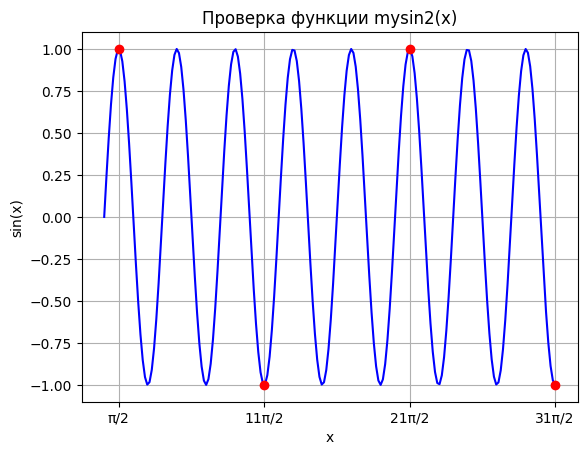

In [37]:
# Задаем значения x для проверки и массив значений от данных аргументов
x_test = [np.pi / 2, 11 * np.pi / 2, 21 * np.pi / 2, 31 * np.pi / 2]
x_labels = ['π/2', '11π/2', '21π/2', '31π/2']    # Подписи к делениям на оси Ox
y_res = []
# Координаты x,y по которым будет строиться график
xs = np.linspace(0, 31 * np.pi / 2 + 0.01, 200)    # Аргументы
ys = []    # Значения

# Вычисляем значения
for x in xs:
    ys.append(mysin2(x))    # Заполняем массив значений для графика
for el in x_test:
    y_res.append(mysin2(el))    # Заполняем массив значений от аргументов для проверки

# Строим график
plt.plot(xs, ys, 'b-')
plt.plot(x_test, y_res, 'ro')
plt.xticks(x_test, x_labels,)
# Добавляем подписи осей и заголовок
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Проверка функции mysin2(x)')
plt.grid()    # Клетчатая сетка 

plt.show()    # Отображаем график


### Для проверки погрешности составим таблицу:

In [44]:
mysin2_test_data = []
for i in range(0, len(x_test)):
    row = [f"{x_test[i]} ({x_labels[i]})", f"{mysin2(x_test[i])}", f"{np.sin(x_test[i])}", f"{abs(mysin2(x_test[i])-np.sin(x_test[i]))}"]
    mysin2_test_data.append(row)
pd.set_option('display.colheader_justify', 'center')    # Включить центрирование заголовков столбцов
pd.set_option('display.max_rows', None)    # Отключить ограничение на максимальное отображаемое кол-во строк
mysin2_test_df = pd.DataFrame(mysin2_test_data, columns=["x", "mysin2(x)", "np.sin(x)", "Погрешность"])
mysin2_test_df

,x,mysin2(x),np.sin(x),Погрешность
0,1.5707963267948966 (π/2),1.0000000000000002,1.0,2.220446049250313e-16
1,17.27875959474386 (11π/2),-1.000000000000001,-1.0,1.1102230246251565e-15
2,32.98672286269283 (21π/2),1.0000000000000002,1.0,2.220446049250313e-16
3,48.69468613064179 (31π/2),-1.000000000000001,-1.0,1.1102230246251565e-15


## Какова точность результатов, полученных для таких  𝑥? Каков максимальный по абсолютному значению член?

Как показано выше, максимальная погрешность, при вычислении заданных значений составляет $1.1102230246251565*10^{-15}$

## 5. Постройте графики зависимости точности от числа слагаемых  𝑛

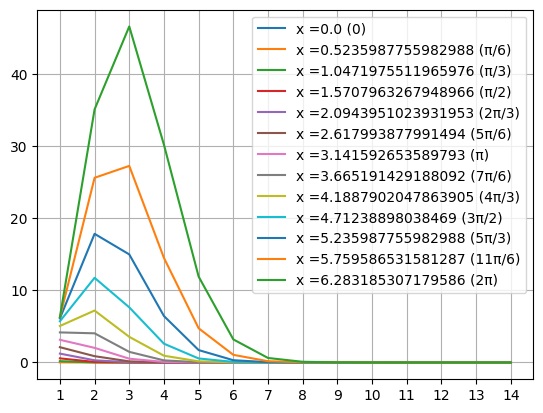

In [33]:
x_test = np.arange(0, 2*np.pi+0.01, np.pi/6)
n_test = np.linspace(1, 14, 14)
x_labels = ['0', 'π/6', 'π/3', 'π/2', '2π/3', '5π/6', 'π', '7π/6', '4π/3', '3π/2', '5π/3', '11π/6', '2π']

for i in range(0,len(x_test)):
    errors = []    # Список погрешностей, в зависимости от аргумента и количества слагаемых
    for n in n_test:
        # Добавляем в список errors модуль разности значений из mysin1(x,n) и np.sin(x) 
        errors.append(abs(mysin1(x_test[i], n) - np.sin(x_test[i])))
    plt.plot(n_test, errors, label=f"x ={x_test[i]} ({x_labels[i]})")
plt.xticks(n_test)    
plt.grid()
plt.legend()
plt.show()

Исходя из графика для всей еденичной окружности с шагом $\frac{\pi}{6}$, можно сделать вывод, что при n = 1 значение mysin1(x,n) равно аргументу. Это логично, так как это следует из формулы. Дальше, по мере увеличения n, графики для первой половины окружности стремятся к нулю (за исключением графика при x = 0, его значения всегда равны нулю), а графики от аргументов, принадлежащих второй половине окружности сначала возрастают до n = 2 или n = 3, а затем убывают и стремятся к нулю. Наибольших значений достигает график от $2\pi$ при n = 3.

Завершая рассуждение, можно сделать вывод, что максимальная погрешность напрямую зависит от поданного аргумента и, чтобы получить более точное значение, при большом аргументе, потребуется большее количество слагаемых.

## Попробуйте объяснить, почему результаты неудовлетворительные

Есть несколько причин, по которым программная интерпретация sin(x, n) рядами Тейлора может быть недостаточно эффективной. Во-первых, из-за бесконечного количества членов в ряду Тейлора, его невозможно вычислить точно, а если придерживаться большой точности, то для некоторых аргументов, может потребоваться настолько же большое количество времени. Помимо этого, ограниченный радиус сходимости ряда Тейлора для sin(x), равный $\pi$, может вызвать ошибки в вычислениях для значений x, которые находятся за пределами этого радиуса.